In [755]:
import pandas as pd
import matplotlib.pyplot as plt
import feather
import os
import random
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
sibling_directory = os.path.join(parent_directory,'data')

In [756]:
processed_directory = os.path.join(sibling_directory, 'processed')
feather_file_path1 = os.path.join(processed_directory, 'icu_chartevents_timeseries_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather')
feather_file_path2 = os.path.join(processed_directory, 'icu_tabular_features_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather')
df1 = feather.read_dataframe(feather_file_path1)
df1 = df1[['abs_event_time', 'stay_id', 'Temperature Celsius']]
df2= feather.read_dataframe(feather_file_path2)
df2 = df2[['subject_id', 'stay_id']]
merged_df = pd.merge(df1, df2, on='stay_id')
merged_df['abs_event_time'] = pd.to_datetime(merged_df['abs_event_time'])
print(merged_df.columns)

Index(['abs_event_time', 'stay_id', 'Temperature Celsius', 'subject_id'], dtype='object')


In [757]:
temperature_values = merged_df['Temperature Celsius'].values
stay_id_values = merged_df['subject_id'].values
time_values = merged_df['abs_event_time'].values
subject_values = merged_df['subject_id'].values
#print("Temperature in Celsius:", temperature_values)
#print("Subject ID Values:", subject_values)
#print("Time Values:", time_values)
grouped_df = merged_df.groupby('subject_id')

#grouped_readings = grouped_df[['abs_event_time', 'Temperature Celsius']].apply(list).to_dict()
#grouped_readings = merged_df.groupby('subject_id').agg({'abs_event_time': list, 'Temperature Celsius': list}).to_dict()
grouped_readings = merged_df.groupby('subject_id').agg({'abs_event_time': list, 'Temperature Celsius': list}).to_dict(orient='index')

keys = grouped_readings.keys()
print(keys)
print(grouped_readings)

dict_keys([10000032, 10001217, 10001725, 10002428, 10002495, 10002930, 10003046, 10003400, 10004235, 10004422, 10004457, 10004720, 10004733, 10005348, 10005817, 10005866, 10005909, 10006053, 10006580, 10007058, 10007795, 10007928, 10008287, 10008454, 10009035, 10009049, 10009628, 10010471, 10010867, 10011398, 10012552, 10012853, 10013049, 10014078, 10014354, 10014729, 10015272, 10015860, 10015931, 10016150, 10016742, 10016810, 10017492, 10018081, 10018328, 10018423, 10018501, 10018845, 10019003, 10019172, 10019385, 10019568, 10019777, 10019917, 10020187, 10020306, 10020640, 10020740, 10020786, 10020944, 10021118, 10021312, 10021487, 10021666, 10021938, 10022017, 10022041, 10022281, 10022880, 10023117, 10023239, 10023771, 10024043, 10025463, 10025612, 10026255, 10026354, 10026406, 10027445, 10027602, 10029291, 10029484, 10031404, 10031757, 10032725, 10035185, 10035631, 10036156, 10037861, 10037928, 10037975, 10038081, 10038933, 10038992, 10038999, 10039708, 10039831, 10039997, 10040025]

In [758]:
random_group_subject_id = random.choice(list(grouped_readings.keys()))
random_group_readings = grouped_readings[random_group_subject_id]
random_group_subject_id = random.choice(list(grouped_df.groups.keys()))
random_group_df = grouped_df.get_group(random_group_subject_id)

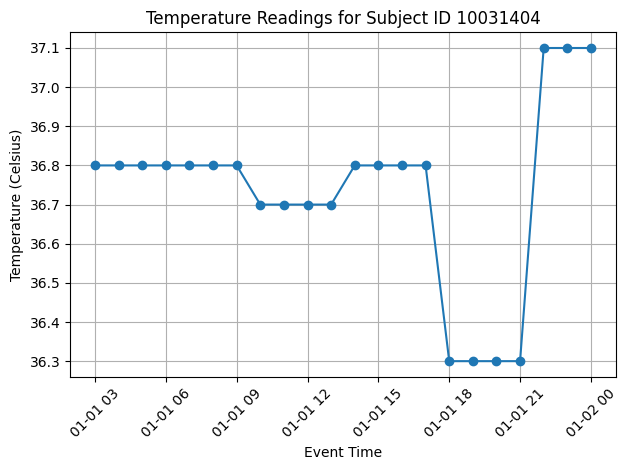

In [759]:
# Plot temperature readings against absolute event times for the random group
plt.plot(random_group_df['abs_event_time'], random_group_df['Temperature Celsius'], marker='o')
plt.title(f'Temperature Readings for Subject ID {random_group_subject_id}')
plt.xlabel('Event Time')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()